<a href="https://colab.research.google.com/github/Karthiknori/MalariaParasite_detection/blob/master/MalariaParasite_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [19]:
pip install tensorflow-gpu==2.0.0-rc0

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

fatal: destination path 'Malaria-Classification-Using-CNN' already exists and is not an empty directory.


In [0]:
img_width = 64
img_height = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [25]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [26]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [27]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
##CNN Model Building

In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [32]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
1378/1378 [==============================] - 158s 114ms/step - loss: 0.5135 - accuracy: 0.7482 - val_loss: 0.2660 - val_accuracy: 0.9238
Epoch 2/5
1378/1378 [==============================] - 154s 111ms/step - loss: 0.2352 - accuracy: 0.9203 - val_loss: 0.1890 - val_accuracy: 0.9316
Epoch 3/5
1378/1378 [==============================] - 154s 112ms/step - loss: 0.1905 - accuracy: 0.9341 - val_loss: 0.1707 - val_accuracy: 0.9358
Epoch 4/5
1378/1378 [==============================] - 156s 113ms/step - loss: 0.1664 - accuracy: 0.9460 - val_loss: 0.1845 - val_accuracy: 0.9381
Epoch 5/5
1378/1378 [==============================] - 156s 113ms/step - loss: 0.1508 - accuracy: 0.9533 - val_loss: 0.1663 - val_accuracy: 0.9437


In [33]:
history.history

{'accuracy': [0.7482311, 0.92031026, 0.93414366, 0.94602686, 0.9532837],
 'loss': [0.5134926433397893,
  0.23520137879562245,
  0.1905082432236874,
  0.16637441661855656,
  0.15082058243464316],
 'val_accuracy': [0.92377496, 0.93157893, 0.93575317, 0.9381125, 0.94373864],
 'val_loss': [0.26604270670508995,
  0.18895062030009602,
  0.17066323353868465,
  0.18452483072768952,
  0.1663281605079554]}

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

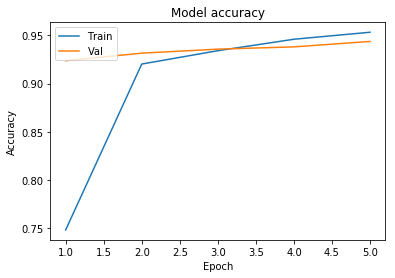

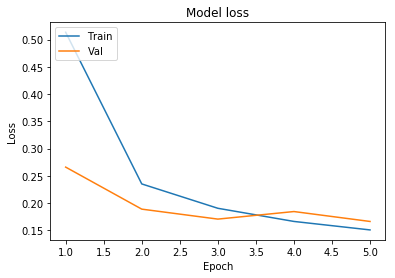

In [35]:
plot_learningCurve(history, 5)